In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person = 60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


# As this is a large dataset,dimensionality of nearly 3000. we will use RandomizedPCA - it contains a randomized method to approximate the first N principal components much more quickly than the standard PCA estimator

In [11]:
from sklearn.decomposition import  PCA as RandomizedPCA #as randomizedpca is deprecated right now
pca = RandomizedPCA(150)
pca.fit(faces.data)

PCA(n_components=150)

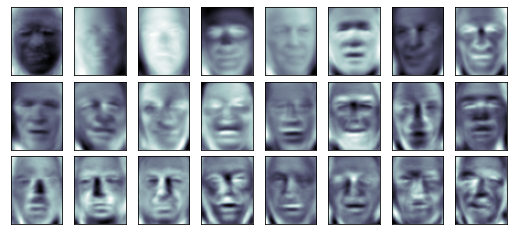

In [12]:
fig,axes = plt.subplots(3,8,figsize = (9,4),
                        subplot_kw = {'xticks': [],'yticks':[]},
                        gridspec_kw = dict(hspace = 0.1, wspace = 0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(62, 47), cmap='bone')


# the first few eigenfaces seem to be associated with the angle of lighting on the face, and later principal vectors seem to be picking out certain features, such as eyes, noses, and lips.

# The cumulative variance of these components will tell how much of the data information the projection is preserving

Text(0, 0.5, 'cumulative explained variance')

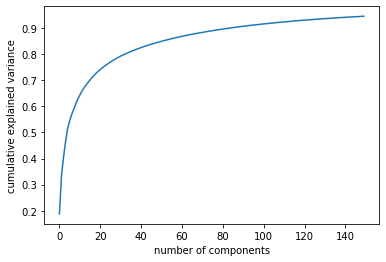

In [13]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

# We see that these 150 components account for just over 90% of the variance. That would lead us to believe that using these 150 components, we would recover most of the essential characteristics of the data. To make this more concrete, we can compare the input images with the images reconstructed from these 150 components

Text(0, 0.5, '150-dim\nreconstruction')

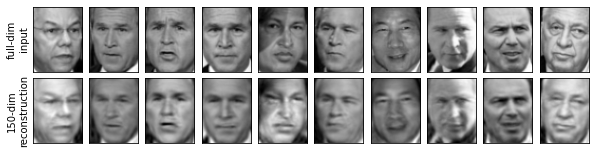

In [14]:
pca = RandomizedPCA(150).fit(faces.data)
components = pca.transform(faces.data)
projected = pca.inverse_transform(components)

fig, ax = plt.subplots(2, 10, figsize=(10, 2.5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')
    
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('150-dim\nreconstruction')

# The top row here shows the input images, while the bottom row shows the reconstruction of the images from just 150 of the ~3,000 initial features. This visualization makes clear why the PCA feature selection used in was so successful: although it reduces the dimensionality of the data by nearly a factor of 20, the projected images contain enough information that we might, by eye, recognize the individuals in the image.

# What this means is that our classification algorithm needs to be trained on 150-dimensional data rather than 3,000-dimensional data